### **Importing Libraries**

In [18]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

In [19]:
SEED = 42

In [20]:
input_file_path = '/kaggle/input/trytry/final_ct.csv'

### **Handling Null Values and Removing Outliers**

In [21]:
# Filter out any warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(input_file_path)

df.dropna(inplace=True)


location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
categorical_cols = ['Crop', 'Fertilization CT ', 'N input', 'ST']


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = [mean-st_dev, mean+st_dev]

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))





def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'var_group' is a list of column names
# UVA_category(data, var_group)




# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



trimmed_df = df.copy()

import matplotlib.pyplot as plt

def UVA_outlier_remove(data, var_group, trimmed_df):
    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)
    for i in var_group:
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25 - (1.5 * IQR)
        whis_high = quant75 + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        # Filtering outliers from trimmed_df
        trimmed_df = trimmed_df[(trimmed_df[i] < whis_high) & (trimmed_df[i] > whis_low)]
    return trimmed_df


trimmed_df = UVA_outlier_remove(df, environmental, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, location, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, grow_time, trimmed_df)

<Figure size 2800x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

<Figure size 2100x400 with 0 Axes>

### **Handling Categorical Variables**

In [22]:
categorical_columns = trimmed_df.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(trimmed_df, columns=categorical_columns)
# Selecting features (X) and target (y)
# Extracting features (X)
X = one_hot_encoded_df.drop(columns=['Yield of CT'])
# Extracting target variable (y)
y = one_hot_encoded_df['Yield of CT']

### **Train/Test Split**

In [23]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### **Normalize data**

In [24]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
#fit_transform() on our X_train data, but only use transform() on our X_test data.
#Not doing this can cause “data leakage” and may give away the answer to our model.

In [25]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

### **Hyperparameter Tuning (GridSearchCV)**

In [26]:
svr = SVR()

# Define hyperparameters grid
param_grid = {
    'kernel': ['linear'],
    #'C': [0.1, 1,10,100,500,1000],
    #'epsilon': [0.1, 0.5,1,5,10]
    'C': [500],
    'epsilon': [ 0.5]
}

# Perform grid search with cross-validation on the normalized training set
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_normalized, y_train)

# Print best parameters
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'C': 500, 'epsilon': 0.5, 'kernel': 'linear'}


In [27]:
print(grid_search.cv_results_['rank_test_score'])
#clearly model performs best with higher values of C

[1]


In [28]:
# Get the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_normalized)
    
mse = mean_squared_error(y_test, predictions)
print("Test Root Mean Squared Error:", np.sqrt(mse))

Test Root Mean Squared Error: 2426.974500205788


### **Feature Importances**

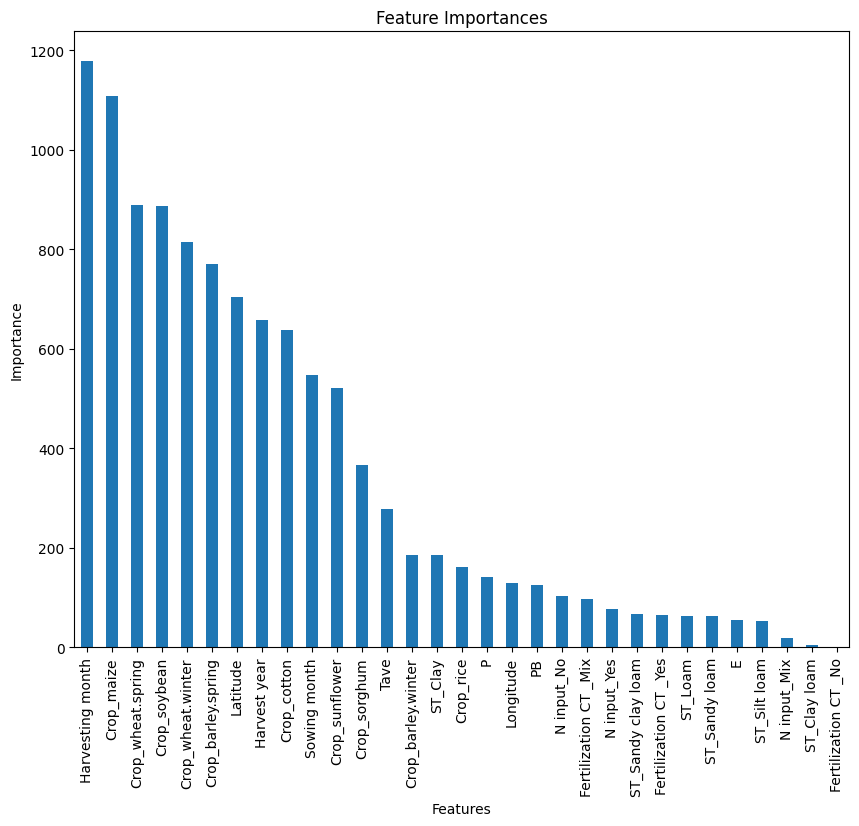

In [29]:

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(np.abs(np.transpose(best_model.coef_[0])), index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# **Custom Implementation**

In [30]:
class SupportVectorRegression:

    def __init__(self, C = 1.0, epsilon = 0.1):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
        self.epsilon = epsilon
        self.losses =[]

    # Loss Function / Calculation
    def loss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (np.dot(w,w.T))
        loss = reg
        
        for i in range(x.shape[0]):
            # Optimization term
            temp =  ((np.dot(w, x[i])) + b) - y[i]

            # calculating loss
            loss += (self.C * max(0, temp - self.epsilon, -1 * temp - self.epsilon))
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.01, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C
        # initialization of w and b
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Mini batch Gradient Descent logic
        for i in range(epochs):

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        
                        
                        temp = Y[j] - (np.dot(w, X[j].T) + b)
                        
                        if temp > self.epsilon:
                            gradw -= c * X[j]
                            gradb -= c
                        elif temp < -1* self.epsilon:
                            gradw += c* X[j]
                            gradb += c
                        
                
                # Updating weights and bias
                w = w - learning_rate * (w + gradw)
                b = b - learning_rate * gradb
            losses.append(self.loss(w,b,X,Y))
            
              
        self.w = w
        self.b = b
        
        self.losses = losses

        

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return prediction

In [31]:
mymodel = SupportVectorRegression(C= 500.0, epsilon = 0.5)

In [32]:
mymodel.fit(X_train_normalized, y_train, batch_size = 1000, learning_rate = 0.01,epochs = 1000)

### **Prediction on Test Set**

In [34]:
y_pred = mymodel.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 2815.0255295922075


### **Feature Importance**

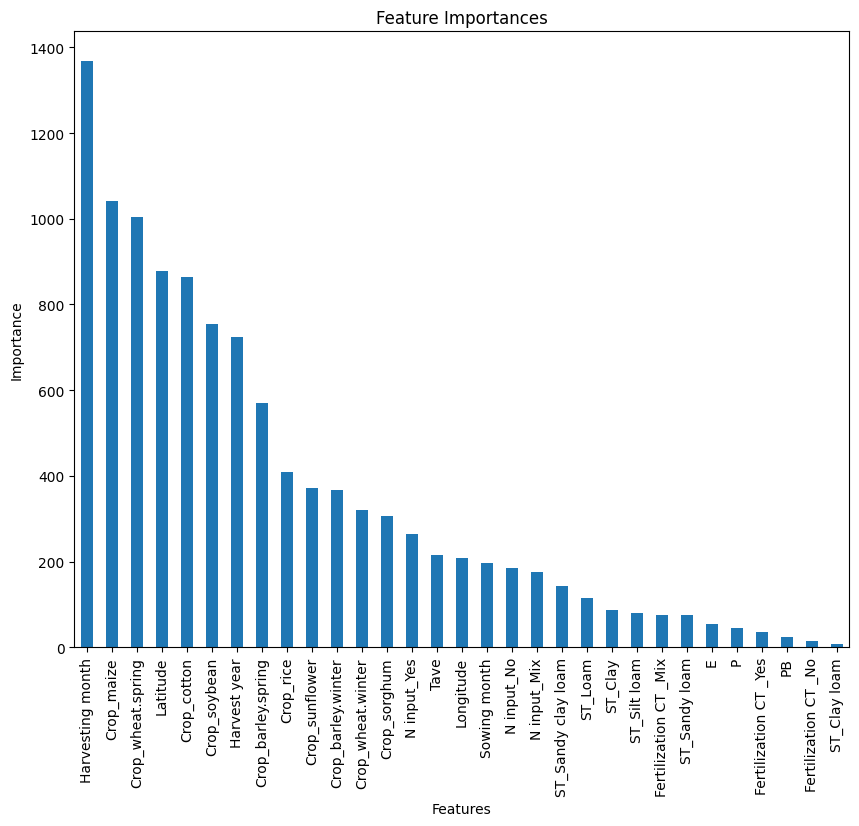

In [36]:

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(np.abs(np.transpose(mymodel.w[0])), index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()